In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-qevaignp
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-qevaignp
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=375528 sha256=54146077a53085b12b1557c1cb8511c7bd4ebe436e61699e567abb0acaf08879
  Stored in directory: /tmp/pip-ephem-wheel-cache-lc9y23yq/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling pycocotools-2.0.7:
      Successfully uninstalled pycocotools-2.0.7


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fUVNuQI7uky4LpsrUd2z")
project = rf.workspace("yomna-hupf9").project("car-jcznw")
dataset = project.version(2).download("coco")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to car-2 in coco:: 100%|██████████| 6357/6357 [00:01<00:00, 3275.34it/s]


In [4]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

In [5]:

annFile='/content/car-2/train/_annotations.coco.json'
img_dir = "/content/car-2/train"

In [6]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!


In [7]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

COCO categories for damages: 
damage-in-cars, crack, dent, glass shatter, lamp broken, scratch, tire flat



**Display image with damage annotation**

In [8]:
catIds = coco.getCatIds(catNms=['crack'])
imgIds = coco.getImgIds(catIds=catIds )
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

253 image id was selected at random from the [4097, 2052, 5, 6, 2054, 4101, 9, 2061, 2062, 2063, 4112, 21, 22, 2072, 25, 2077, 2078, 4131, 37, 2087, 4135, 4137, 44, 4141, 46, 2097, 2101, 4149, 2104, 4153, 4157, 4161, 66, 2116, 69, 73, 2122, 4171, 2124, 77, 4174, 79, 4178, 2132, 2133, 2134, 87, 2136, 89, 4186, 93, 97, 2145, 2147, 100, 101, 2148, 2149, 2150, 4202, 4204, 114, 4210, 116, 4213, 119, 2168, 2171, 4221, 4224, 2177, 2179, 134, 2186, 4237, 2192, 2197, 2198, 151, 158, 2209, 2210, 4257, 4265, 2222, 4270, 2230, 2231, 185, 193, 194, 4292, 4293, 4298, 2251, 2257, 4307, 2261, 214, 215, 4309, 2265, 218, 4311, 232, 2282, 4330, 4338, 4340, 253, 4352, 4353, 261, 2310, 4361, 4362, 4363, 268, 4366, 272, 2320, 2321, 4371, 277, 2326, 279, 283, 289, 4385, 294, 296, 2345, 4392, 2350, 4398, 2352, 307, 2355, 4404, 314, 315, 2362, 317, 2364, 4412, 320, 4413, 4416, 4417, 4418, 4419, 329, 2378, 4425, 332, 4431, 2384, 4434, 2388, 342, 347, 2395, 2397, 2399, 4447, 4449, 354, 355, 360, 2409, 2411, 2412

In [9]:
imgId = coco.getImgIds(imgIds = [random_img_id])
annId = coco.getAnnIds(imgIds=imgId,iscrowd=None)
img = coco.loadImgs(imgId)[0]
anns = coco.loadAnns(annId)
print("Image details \n",img)

Image details 
 {'id': 253, 'license': 1, 'file_name': '002556_jpg.rf.942d6a875d6ca824667be2c7bb51df97.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-12-23T16:35:00+00:00'}


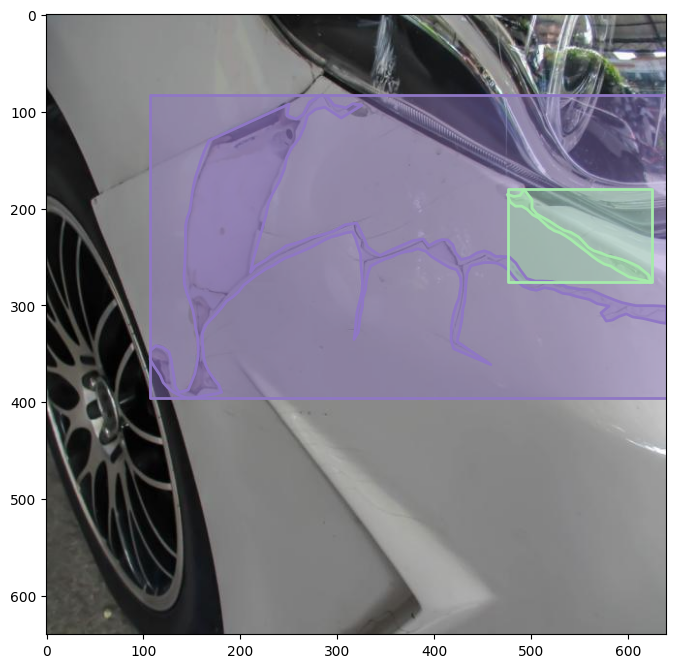

In [10]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('on')
plt.imshow(I)
coco.showAnns(anns, draw_bbox=True )

**Detectron2 Model training**

In [11]:
# Install detectron 2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-adbo87jo
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-adbo87jo
  Resolved https://github.com/facebookresearch/detectron2.git to commit 864913f0e57e87a75c8cc0c7d79ecbd774fc669b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6119674 sha256=55a401f0b6e1195155fe0cd0fc607

In [12]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

2.1.0+cu121 True


In [13]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

In [14]:
!python -m detectron2.utils.collect_env

-------------------------------  -----------------------------------------------------------------
sys.platform                     linux
Python                           3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy                            1.23.5
detectron2                       0.6 @/usr/local/lib/python3.10/dist-packages/detectron2
Compiler                         GCC 11.4
CUDA compiler                    CUDA 12.2
detectron2 arch flags            7.5
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          2.1.0+cu121 @/usr/local/lib/python3.10/dist-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    Yes
GPU 0                            Tesla T4 (arch=7.5)
Driver version                   535.104.05
CUDA_HOME                        /usr/local/cuda
Pillow                           9.4.0
torchvision                      0.16.0+cu121 @/usr/local/lib/python3.10/dist-packages/torch

In [15]:
import os

base_path = "/content/car-2/"

datasets = ["train", "valid", "test"]

for dataset in datasets:
    annotation_file_path = os.path.join(base_path, dataset, "_annotations.coco.json")

    if os.path.exists(annotation_file_path):
        print(f"The file '{annotation_file_path}' exists for {dataset} dataset.")
    else:
        print(f"The file '{annotation_file_path}' does not exist for {dataset} dataset.")


The file '/content/car-2/train/_annotations.coco.json' exists for train dataset.
The file '/content/car-2/valid/_annotations.coco.json' exists for valid dataset.
The file '/content/car-2/test/_annotations.coco.json' exists for test dataset.


In [16]:
dataset_dir = "/content/car-2/"
ann_train ="/content/car-2/train/_annotations.coco.json"
ann_valid="/content/car-2/valid/_annotations.coco.json"
img_train_dir = "/content/car-2/train/"
img_val_dir = "/content/car-2/train/"

In [17]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("dataset_train", {},"/content/car-2/train/_annotations.coco.json" , "/content/car-2/train/")
register_coco_instances("dataset_val", {}, "/content/car-2/valid/_annotations.coco.json", "/content/car-2/valid/")
register_coco_instances("dataset_test", {}, "/content/car-2/test/_annotations.coco.json","/content/car-2/test/")

In [18]:
dataset_dicts = DatasetCatalog.get("dataset_train")
metadata_dicts = MetadataCatalog.get("dataset_train")

WARNING [01/21 16:04:28 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/21 16:04:28 d2.data.datasets.coco]: Loaded 5234 images in COCO format from /content/car-2/train/_annotations.coco.json


In [19]:
#Implementing my own Trainer Module here to use the COCO validation evaluation during training
# TODO: add data custom augmentation
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [22]:
import os
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer

# Set up the configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("dataset_train",)
cfg.DATASETS.TEST = ("dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7
cfg.TEST.EVAL_PERIOD = 0  # Increase this number if you want to monitor validation performance during training

# Specify the custom output directory path
custom_output_dir = "/content/drive/MyDrive/output_detectron2"
cfg.OUTPUT_DIR = custom_output_dir

# Create the output directory if it doesn't exist
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Set up the trainer
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[01/21 16:54:00 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[01/21 16:54:01 d2.engine.train_loop]: Starting training from iteration 0
[01/21 16:54:10 d2.utils.events]:  eta: 0:06:32  iter: 19  total_loss: 2.983  loss_cls: 1.995  loss_box_reg: 0.1603  loss_mask: 0.6934  loss_rpn_cls: 0.07626  loss_rpn_loc: 0.01832    time: 0.4144  last_time: 0.4196  data_time: 0.0199  last_data_time: 0.0057   lr: 4.9953e-06  max_mem: 2978M
[01/21 16:54:18 d2.utils.events]:  eta: 0:06:21  iter: 39  total_loss: 2.803  loss_cls: 1.84  loss_box_reg: 0.1412  loss_mask: 0.6915  loss_rpn_cls: 0.0494  loss_rpn_loc: 0.01718    time: 0.4004  last_time: 0.4091  data_time: 0.0134  last_data_time: 0.0061   lr: 9.9902e-06  max_mem: 2978M
[01/21 16:54:25 d2.utils.events]:  eta: 0:06:10  iter: 59  total_loss: 2.406  loss_cls: 1.463  loss_box_reg: 0.1443  loss_mask: 0.6919  loss_rpn_cls: 0.06375  loss_rpn_loc: 0.02151    time: 0.3944  last_time: 0.4213  data_time: 0.0095  last_data_time: 0.0165   lr: 1.4985e-05  max_mem: 2978M
[01/21 16:54:33 d2.utils.events]:  eta: 0:06:02  ite

In [30]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[01/21 17:47:35 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/output_detectron2/model_final.pth ...


In [31]:
val_dataset_dicts = DatasetCatalog.get("dataset_val")
val_metadata_dicts = MetadataCatalog.get("dataset_val")

WARNING [01/21 17:48:32 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/21 17:48:32 d2.data.datasets.coco]: Loaded 745 images in COCO format from /content/car-2/valid/_annotations.coco.json
